In [7]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-09-27 17:38:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  7.52MB/s    in 33s     

2020-09-27 17:38:46 (9.25 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [8]:
!unzip rockpaperscissors

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6Cay.png  
  inflating: rockpaperscissors/scissors/2DEYFsJ27UgVq

In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.2)

In [11]:
train_generator = train_datagen.flow_from_directory(
        'rockpaperscissors/rps-cv-images',
        target_size=(100, 150), 
        shuffle=True,
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        'rockpaperscissors/rps-cv-images',
        target_size=(100, 150),
        subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10880)             0

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
model.fit(
      train_generator,
      steps_per_epoch=32,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2)

Epoch 1/20
32/32 - 7s - loss: 0.9983 - accuracy: 0.5439 - val_loss: 0.6299 - val_accuracy: 0.7578
Epoch 2/20
32/32 - 7s - loss: 0.4590 - accuracy: 0.8301 - val_loss: 0.2736 - val_accuracy: 0.9102
Epoch 3/20
32/32 - 7s - loss: 0.2756 - accuracy: 0.8994 - val_loss: 0.2344 - val_accuracy: 0.9180
Epoch 4/20
32/32 - 7s - loss: 0.1987 - accuracy: 0.9379 - val_loss: 0.1732 - val_accuracy: 0.9531
Epoch 5/20
32/32 - 7s - loss: 0.1334 - accuracy: 0.9567 - val_loss: 0.1741 - val_accuracy: 0.9375
Epoch 6/20
32/32 - 7s - loss: 0.1272 - accuracy: 0.9517 - val_loss: 0.1475 - val_accuracy: 0.9414
Epoch 7/20
32/32 - 7s - loss: 0.1052 - accuracy: 0.9668 - val_loss: 0.1361 - val_accuracy: 0.9492
Epoch 8/20
32/32 - 7s - loss: 0.1000 - accuracy: 0.9639 - val_loss: 0.0617 - val_accuracy: 0.9766
Epoch 9/20
32/32 - 7s - loss: 0.1124 - accuracy: 0.9561 - val_loss: 0.0771 - val_accuracy: 0.9727
Epoch 10/20
32/32 - 7s - loss: 0.0758 - accuracy: 0.9803 - val_loss: 0.1062 - val_accuracy: 0.9688
Epoch 11/20
32/32 -

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 1.jpg to 1.jpg
1.jpg
paper


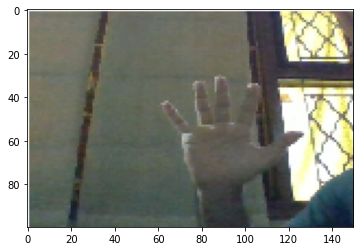

In [20]:

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')